<a href="https://colab.research.google.com/github/mostynw/clash_royale_vis/blob/main/ClashRoyale_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#make it so 100 rows can be seen at once
pd.set_option('display.max_rows', 100)
#level relevant hp and damage
dcr = pd.read_csv("/content/drive/MyDrive/Data/cardsInfo.csv")
dcr.head(3)

,Unnamed: 0,id,elixir,link,name,level1,hitpoints1,damage1,level2,hitpoints2,...,damage11,level12,hitpoints12,damage12,level13,hitpoints13,damage13,level14,hitpoints14,damage14
0,0,Skellies,1,https://www.deckshop.pro/card/detail/Skellies,Skeletons,1,32.0,96.0,2,35.0,...,243.0,12,89.0,267.0,13,98.0,294.0,14,108.0,324.0
1,1,IceSpirit,1,https://www.deckshop.pro/card/detail/IceSpirit,Ice Spirit,1,90.0,43.0,2,99.0,...,110.0,12,252.0,120.0,13,278.0,132.0,14,305.0,145.0
2,2,Heal,1,https://www.deckshop.pro/card/detail/Heal,Heal,1,0.0,0.0,2,0.0,...,0.0,12,0.0,0.0,13,0.0,0.0,14,0.0,0.0


In [ ]:
initial_attributes = list(dcr)

In [ ]:
#get rid of irrelevent columns, keep level 11 stats 
initial_attributes = list(dcr) 
dcr = dcr.drop(['Unnamed: 0','id','link','level1','hitpoints1','damage1','level2','hitpoints2',
 'damage2','level3','hitpoints3','damage3', 'level4', 'hitpoints4', 'damage4', 'level5', 'hitpoints5',
 'damage5', 'level6', 'hitpoints6', 'damage6', 'level7', 'hitpoints7', 'damage7', 'level8',
 'hitpoints8', 'damage8', 'level9', 'hitpoints9', 'damage9', 'level10', 'hitpoints10', 'damage10', 'level11',
 'hitpoints11', 'damage11', 'level12', 'level13', 'hitpoints13', 'damage13', 'level14', 'hitpoints14', 'damage14'], axis=1)

In [ ]:
#drop irrelevent cards such as spells and buildings
dcr = dcr.drop([94, 88, 84, 83, 81, 80, 77, 66, 65, 63, 58, 55, 53, 50, 48, 46, 
                40, 39, 38, 31, 29, 25, 22, 19, 15, 13, 12, 11, 10, 8, 7, 5, 2, 1]) 

In [ ]:
#clean up columns
dcr.columns = dcr.columns.str.capitalize()
dcr = dcr.rename(columns={"Name": "Card"})

In [ ]:
#read in previous clash dataset
dcr2 = pd.read_csv("/content/drive/MyDrive/Data/ClashNEW.csv")
dcr2.head(3)

,Unnamed: 0,Card,Cost,Count,Health,Damage,Speed,Range,Deploy Time,Hit Speed,Damage per second,Death Damage,Targets,Type
0,0,Archers,3,2,254,86,Medium,5.0,1,1.2,71,0,Ground & Air,Troop
1,1,Baby Dragon,4,1,1064,133,Medium,3.5,1,1.6,83,0,Ground & Air,Flying Creature
2,2,Balloon,5,1,1396,798,Medium,0.0,1,3.0,266,272,Buildings,Vehicle


In [ ]:
#merge the datasets on card names and look to fill in the blanks
dcr3 = pd.merge(dcr, dcr2, on="Card", how='left')

In [ ]:
#lets start again on most of these columns
dcr3_attributes = list(dcr3)
dcr3 = dcr3.drop(['Unnamed: 0', 'Cost', 'Health',
 'Damage', 'Damage per second', 'Speed', 'Targets', 'Type', 'Deploy Time'], axis=1)

In [ ]:
#set speed column values
fast = ['Mini P.E.K.K.A', 'Bandit', 'Electro Wizard', 'Miner', 'Skeleton Barrel', 'Goblin Gang', 'Royal Ghost', 'Flying Machine' ]
slow = ['Royal Giant', 'Giant', 'P.E.K.K.A', 'Golem', 'Lava Hound', 'Bowler', 'Ice Golem', 'Sparky', 'Elixir Golem']
very_fast = ['Bats', 'Spear Goblins', 'Goblins', 'Elite Barbarians', 'Hog Rider', 'Dart Goblin', 'Lumberjack', 'Ice Spirit',
             'Fire Spirit', 'Wall Breakers', 'Royal Hogs']

dcr3.insert(5, "Speed", 'Medium')

for cards in fast:
  dcr3.loc[(dcr3.Card == cards),'Speed']='Fast'
for cards in slow:
  dcr3.loc[(dcr3.Card == cards),'Speed']='Slow'
for cards in very_fast:
  dcr3.loc[(dcr3.Card == cards),'Speed']='Very Fast'


In [ ]:
#set count column values
solo = ['Mega Knight', 'P.E.K.K.A', '	Goblin Giant', 'Ram Rider', 'Electro Dragon', 'Magic Archer', 
        'Hunter', 'Flying Machine', 'Mini P.E.K.K.A', 'Royal Ghost', 'Fisherman', 'Elixir Golem', 
        'Fire Spirits', 'Ice Spirit', 'Goblin Giant' ]
double = ['Battle Ram', 'Wall Breakers']
triple = ['Zappies', 'Goblin Barrel']
six = ['Royal Recruits', 'Royal Hogs', 'Goblin Gang', 'Skeleton Barrel']

for cards in solo:
  dcr3.loc[(dcr3.Card == cards),'Count']=1.0
for cards in double:
  dcr3.loc[(dcr3.Card == cards),'Count']=2.0
for cards in triple:
  dcr3.loc[(dcr3.Card == cards),'Count']=3.0
for cards in six:
  dcr3.loc[(dcr3.Card == cards),'Count']=6.0
  

In [ ]:
#set range column values

dcr3['Range'] = dcr3['Range'].fillna(0.0)

dcr3.loc[(dcr3.Card == 'Goblin Gang'),'Range']=2.5
dcr3.loc[(dcr3.Card == 'Fisherman'),'Range']=7.0
dcr3.loc[(dcr3.Card == 'Flying Machine'),'Range']=6.0
dcr3.loc[(dcr3.Card == 'Zappies'),'Range']=4.5
dcr3.loc[(dcr3.Card == 'Hunter'),'Range']=4.0
dcr3.loc[(dcr3.Card == 'Magic Archer'),'Range']=7.0
dcr3.loc[(dcr3.Card == 'Electro Dragon'),'Range']=3.5
dcr3.loc[(dcr3.Card == 'Ice Spirit'),'Range']=2.0
dcr3.loc[(dcr3.Card == 'Fire Spirits'),'Range']=2.0


In [ ]:
#set death damage column values
dcr3['Death Damage'] = dcr3['Death Damage'].fillna(0.0)

In [ ]:
#set hit speed column values
dcr3.loc[(dcr3.Card == 'Goblin Gang'),'Hit Speed']=1.2
dcr3.loc[(dcr3.Card == 'Skeleton Barrel'),'Hit Speed']=1.0
dcr3.loc[(dcr3.Card == 'Goblin Barrel'),'Hit Speed']=1.1
dcr3.loc[(dcr3.Card == 'Elixir Golem'),'Hit Speed']=1.3
dcr3.loc[(dcr3.Card == 'Fisherman'),'Hit Speed']=1.3
dcr3.loc[(dcr3.Card == 'Royal Ghost'),'Hit Speed']=1.8
dcr3.loc[(dcr3.Card == 'Mini P.E.K.K.A'),'Hit Speed']=1.6
dcr3.loc[(dcr3.Card == 'Battle Ram'),'Hit Speed']=1.4
dcr3.loc[(dcr3.Card == 'Flying Machine'),'Hit Speed']=1.1
dcr3.loc[(dcr3.Card == 'Zappies'),'Hit Speed']=2.1
dcr3.loc[(dcr3.Card == 'Hunter'),'Hit Speed']=2.2
dcr3.loc[(dcr3.Card == 'Magic Archer'),'Hit Speed']=1.1
dcr3.loc[(dcr3.Card == 'Royal Hogs'),'Hit Speed']=1.2
dcr3.loc[(dcr3.Card == 'Electro Dragon'),'Hit Speed']=2.1
dcr3.loc[(dcr3.Card == 'Ram Rider'),'Hit Speed']=1.8
dcr3.loc[(dcr3.Card == 'Royal Hogs'),'Hit Speed']=1.2
dcr3.loc[(dcr3.Card == 'Goblin Giant'),'Hit Speed']=1.5
dcr3.loc[(dcr3.Card == 'Royal Recruits'),'Hit Speed']=1.3
dcr3.loc[(dcr3.Card == 'P.E.K.K.A'),'Hit Speed']=1.8
dcr3.loc[(dcr3.Card == 'Mega Knight'),'Hit Speed']=1.7


In [ ]:
#create dps column 
dcr3['Damage per second'] = dcr3['Damage12']//dcr3['Hit Speed']


In [ ]:
#create rarity column 

rare = ['Ice Golem', 'Mega Minion', 'Dart Goblin', 'Elixir Golem', 'Valkyrie', 'Musketeer', 'Mini P.E.K.K.A',
        'Hog Rider', 'Battle Ram', 'Zappies', 'Flying Machine', 'Giant', 'Wizard', 'Royal Hogs', 'Three Musketeers']
epic = ['Wall Breakers', 'Barbarian Barrel', 'Skeleton Army', 'Guards', 'Goblin Barrel', 'Baby Dragon', 'Dark Prince',
        'Hunter', 'Balloon', 'Witch', 'Prince', 'Bowler', 'Executioner', 'Cannon Cart', 'Electro Dragon', 'Giant Skeleton',
        'Goblin Giant', 'P.E.K.K.A', 'Electro Giant', 'Golem', '']
legendary = ['Ice Wizard', 'Princess', 'Bandit', 'Lumberjack', 'Electro Wizard', 
             'Magic Archer', 'Ram Rider', 'Sparky', 'Lava Hound', 'Mega Knight']

dcr3.insert(10, "Rarity", 'Common')

for cards in rare:
  dcr3.loc[(dcr3.Card == cards),'Rarity']= 'Rare'
for cards in epic:
  dcr3.loc[(dcr3.Card == cards),'Rarity']= ' Epic'
for cards in legendary:
  dcr3.loc[(dcr3.Card == cards),'Rarity']= 'Legendary'
  

In [ ]:
#create type 1 column

skeleton = ['Skeleton', 'Skeleton Barrel', 'Giant Skeleton', 'Bomber', 'Skeleton Army', 'Guards']
goblin = ['Goblins', 'Spear Goblins', 'Goblin Gang', 'Dart Goblin', 'Goblin Barrel', 'Goblin Giant']
magic = ['Ice Wizard', 'Wizard', 'Magic Archer', 'Night Witch', 'Witch', 'Giant', 'Royal Giant', 
         'Electro Wizard', 'Royal Ghost']
machine = ['Sparky', 'Flying Machine', 'Cannon Cart', 'Balloon', 'Zappies']
creature = ['Bats', 'Ice Golem', 'Minions', 'Minion Horde', 'Mega Minion', 'Elixir Golem', 'Baby Dragon',
            'Royal Hogs', 'Bowler', 'Electro Dragon', 'Lava Hound', 'Golem']


dcr3.insert(11, "Type 1", 'Troop')

for cards in skeleton:
  dcr3.loc[(dcr3.Card == cards),'Type 1']= 'Skeleton'
for cards in goblin:
  dcr3.loc[(dcr3.Card == cards),'Type 1']= 'Goblin'
for cards in magic:
  dcr3.loc[(dcr3.Card == cards),'Type 1']= 'Magic'
for cards in machine:
  dcr3.loc[(dcr3.Card == cards),'Type 1']= 'Machine'
for cards in creature:
  dcr3.loc[(dcr3.Card == cards),'Type 1']= 'Creature'
  

In [ ]:
#create type 2 column

flying = ['Bats', 'Minions', 'Minion Horde', 'Mega Minion', 'Baby Dragon', 'Electro Dragon', 
          'Balloon', 'Flying Machine', 'Lava Hound']

dcr3.insert(12, "Type 2", 'Ground')

for cards in flying:
  dcr3.loc[(dcr3.Card == cards),'Type 2']= 'Flying'

In [ ]:
#create target column

building = ['Hog Rider', 'Royal Giant', 'Golem', 'Giant', 'Lava Hound', 'Ice Golem', 'Balloon', 'Ram Rider', 
            'Elixir Golem', 'Battle Ram', 'Royal Hogs', 'Goblin Giant']
groundair = ['Electro Wizard', 'Baby Dragon', 'Minions', 'Minion Horde', 'Mega Minion', 'Executioner', 'Musketeer',
             'Wizard', 'Witch', 'Ice Wizard', 'Princess', 'Archers', 'Three Musketeers', 'Dart Goblin', 'Spear Goblin',
             'Bats', 'Spear Goblins', 'Goblin Gang', 'Flying Machine', 'Zappies', 'Hunter', 'Magic Archer', 
             'Electro Dragon']

dcr3.insert(13, "Targets", 'Ground')

for cards in building:
  dcr3.loc[(dcr3.Card == cards),'Targets']='Buildings' 
for cards in groundair:
  dcr3.loc[(dcr3.Card == cards),'Targets']='Ground & Air'

In [ ]:
#rename columns and tidy order 
dcr3 = dcr3.rename(columns={"Hitpoints12": "Hitpoints", 'Damage12':'Damage'})
dcr3 = dcr3[['Card', 'Rarity', 'Elixir', 'Count', 'Hitpoints', 'Damage', 'Range', 
            'Hit Speed', 'Damage per second', 'Death Damage', 'Speed', 'Type 1', 
            'Type 2', 'Targets']]

In [ ]:
#set dtypes for each column
dcr3['Count'] = dcr3['Count'].astype(int)
dcr3['Hitpoints'] = dcr3['Hitpoints'].astype(int)
dcr3['Damage'] = dcr3['Damage'].astype(int)
dcr3['Death Damage'] = dcr3['Death Damage'].astype(int)
dcr3['Damage per second'] = dcr3['Damage per second'].astype(int)

dcr3.dtypes

Card                  object
Rarity                object
Elixir                 int64
Count                  int64
Hitpoints              int64
Damage                 int64
Range                float64
Hit Speed            float64
Damage per second      int64
Death Damage           int64
Speed                 object
Type 1                object
Type 2                object
Targets               object
dtype: object

In [ ]:
#looks beautiful
dcr3

,Card,Rarity,Elixir,Count,Hitpoints,Damage,Range,Hit Speed,Damage per second,Death Damage,Speed,Type 1,Type 2,Targets
0,Skeletons,Common,1,3,89,267,0.0,1.0,267,0,Medium,Troop,Ground,Ground
1,Goblins,Common,2,3,221,396,0.0,1.1,359,0,Very Fast,Goblin,Ground,Ground
2,Spear Goblins,Common,2,3,146,267,5.0,1.3,205,0,Very Fast,Goblin,Ground,Ground & Air
3,Bats,Common,2,5,89,445,0.0,1.0,445,0,Very Fast,Creature,Flying,Ground & Air
4,Ice Golem,Rare,2,1,1316,93,1.0,2.5,37,70,Slow,Creature,Ground,Buildings
5,Archers,Common,3,2,334,236,5.0,1.2,196,0,Medium,Troop,Ground,Ground & Air
6,Knight,Common,3,1,1832,221,0.0,1.1,200,0,Medium,Troop,Ground,Ground
7,Minions,Common,3,3,252,336,2.0,1.0,336,0,Medium,Creature,Flying,Ground & Air
8,Bomber,Common,3,1,528,359,4.5,1.9,188,0,Medium,Skeleton,Ground,Ground
9,Skeleton Barrel,Common,3,6,843,146,0.0,1.0,146,0,Fast,Skeleton,Ground,Ground


In [ ]:
#save and export the dataset 
from google.colab import files
dcr3.to_csv('ClashBEST.csv')
files.download('ClashBEST.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

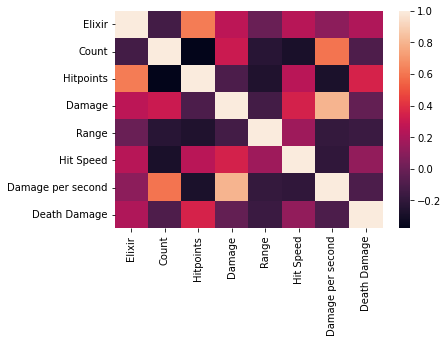

In [ ]:
#create correlation matrix
numerics = ['int64','float64']
n_dcr3 = dcr3.select_dtypes(include=numerics)

import seaborn as sns 
dcr3_corr = n_dcr3.corr()
sns.heatmap(dcr3_corr);

In [ ]:
#see some counters
from collections import Counter

print(Counter(dcr3['Type 1']))
print("")
print(Counter(dcr3['Type 2']))
print("")
print(Counter(dcr3['Targets']))
print("")
print(Counter(dcr3['Speed']))
print("")
print(Counter(dcr3['Rarity']))

Counter({'Troop': 24, 'Creature': 12, 'Magic': 9, 'Goblin': 6, 'Skeleton': 5, 'Machine': 5})

Counter({'Ground': 52, 'Flying': 9})

Counter({'Ground': 27, 'Ground & Air': 22, 'Buildings': 12})

Counter({'Medium': 36, 'Slow': 9, 'Very Fast': 8, 'Fast': 8})

Counter({'Common': 19, ' Epic': 17, 'Rare': 15, 'Legendary': 10})


In [ ]:
dcr3.describe()

,Elixir,Count,Hitpoints,Damage,Range,Hit Speed,Damage per second,Death Damage
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,4.245902,2.049180,1353.229508,423.672131,2.229508,1.549180,293.508197,25.540984
std,1.577506,2.186521,1255.914373,329.395240,2.673284,0.681083,231.404669,130.513163
min,1.000000,1.000000,89.000000,59.000000,0.000000,0.700000,37.000000,0.000000
25%,3.000000,1.000000,528.000000,221.000000,0.000000,1.100000,159.000000,0.000000
50%,4.000000,1.000000,982.000000,293.000000,0.000000,1.500000,212.000000,0.000000
75%,5.000000,3.000000,1832.000000,445.000000,5.000000,1.700000,359.000000,0.000000
max,9.000000,14.000000,5632.000000,1463.000000,9.000000,5.000000,1335.000000,957.000000
